## Objective

Use neural network from tensorflow to apprximate diffusion maps 

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout

## training data

In [78]:
with h5py.File('train_data.mat', 'r') as f :
    x_train = np.transpose( f["x"][()] ) ;
    y_train = np.transpose( f["y"][()] ) ;

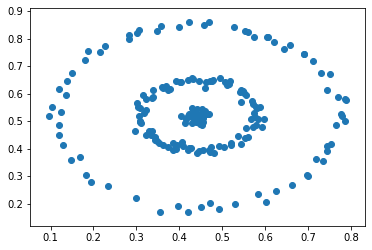

In [79]:
plt.scatter(x_train[:,0] , x_train[:,1])

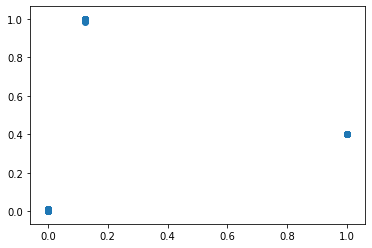

In [80]:
plt.scatter(y_train[:,0] , y_train[:,1])

## Model

In [81]:
model = Sequential()

In [82]:
# dense1
model.add(Dense(256 , input_dim = 2 , activation = 'relu'))
# dense2
model.add(Dropout(0.25)) ;
model.add(Dense(2 , activation = 'relu'))

In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               768       
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 514       
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(loss = 'mse' , optimizer = 'sgd')

## Training

In [93]:
train_history = model.fit(x = x_train , y = y_train , epochs = 5000 , batch_size = 10 , verbose = 0 )

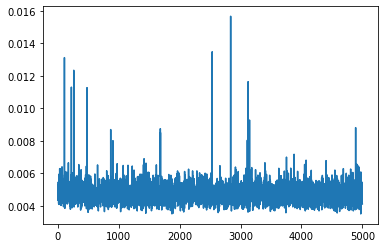

In [94]:
plt.plot(train_history.history['loss'])

In [95]:
scores = model.evaluate(x_train , y_train)

7/7 [==============================] - 0s 712us/step - loss: 0.0027


## Predict

In [96]:
y_test = model.predict(x_train , batch_size = 1)

Text(0.5, 1.0, 'neural network')

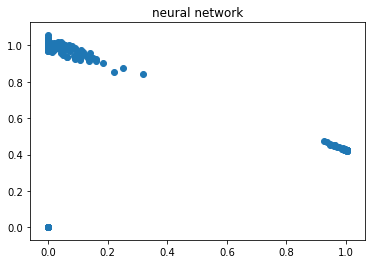

In [97]:
plt.scatter(y_test[:,0] , y_test[:,1])
plt.title('neural network')

Text(0.5, 1.0, 'diffusion maps')

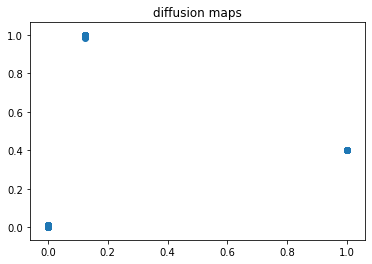

In [98]:
plt.scatter(y_train[:,0] , y_train[:,1])
plt.title('diffusion maps')

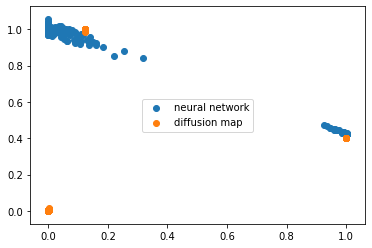

In [99]:
plt.scatter(y_test[:,0] , y_test[:,1])
plt.scatter(y_train[:,0] , y_train[:,1])
plt.legend(["neural network" , "diffusion map"] , loc='center')